In [18]:
import utm
import math
import numpy as np
import pandas as pd
import re
import geopandas as gpd
import scipy.io as sio
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import datetime
import geomag
import utm

In [2]:
#declinação magnética
geomag.declination(dlat =  45.128256, dlon = -93.299030, time = datetime.date(2010, 8, 4))

0.7582785475697479

In [160]:
df =  pd.read_csv(r"E:\Usuário\Pablo\Documents\MEGAsync\Trabalhos hidrologia\medições de vazao\Curso Qrev\Data\M9_Eel\20100804102527.sum", encoding='windows-1252')  
df_matlab = sio.loadmat(r"E:\Usuário\Pablo\Documents\MEGAsync\Trabalhos hidrologia\medições de vazao\Curso Qrev\Data\M9_Eel\20100804102527.mat")
df_utm = pd.DataFrame({'utm_x' : [x[0] for x in df_matlab['GPS'][0][-1][-2]], 'utm_y' : [x[1] for x in df_matlab['GPS'][0][-1][-2]]})

In [162]:
nome_final = 'rio_missisipi' + '_' +'20100804102527'

In [164]:
#Função para alinhamento da medição.
a, b = np.polyfit((df_utm['utm_x'].iloc[1] , df_utm['utm_x'].iloc[-1]), (df_utm['utm_y'].iloc[1] , df_utm['utm_y'].iloc[-1]), 1)

In [165]:
#Criando alinhamento para embarcação. 
df_utm['utm_y_alinhado'] = a * df_utm['utm_x'] + b

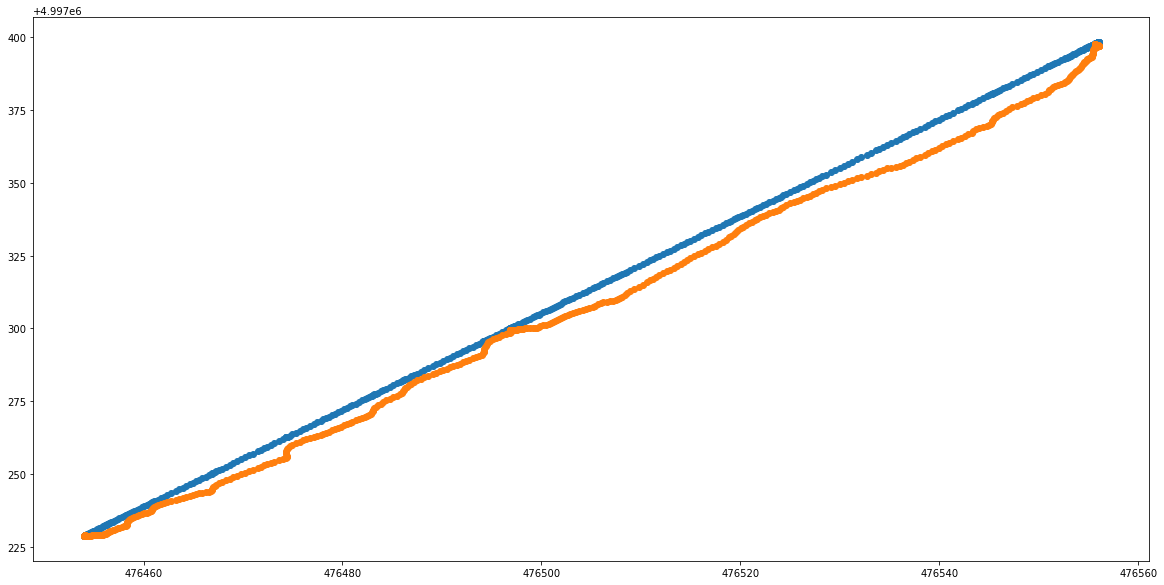

In [166]:
plt.figure(figsize = (20, 10))

plt.scatter(df_utm['utm_x'], df_utm['utm_y_alinhado'])
plt.scatter(df_utm['utm_x'], df_utm['utm_y'])
plt.show();

In [167]:
fator_multiplicador = 50

df_utm['x_reprojetado'] = (np.sin(np.radians(df['Direction (deg)'])) * fator_multiplicador * df['Mean Speed (m/s)']) + df_utm['utm_x']
df_utm['y_barco'] = (np.cos(np.radians(df['Direction (deg)'])) * fator_multiplicador * df['Mean Speed (m/s)']) + df_utm['utm_y']
df_utm['y_alinhamento_medição'] = (np.cos(np.radians(df['Direction (deg)'])) * fator_multiplicador * df['Mean Speed (m/s)']) + df_utm['utm_y_alinhado']

In [170]:
#Agregar para tabela de atributo.
df_utm['velocidade'] = df['Mean Speed (m/s)']

In [171]:
#Exportando os dados com travessia no sentido do barco.

fichamento = {'id_vetor' : [],
              'velocidade' : [],
              'vetor' : []}

for i, valores in df_utm.iterrows():
    #print(valores)
    fichamento['id_vetor'].append(i)
    fichamento['velocidade'].append(valores['velocidade'])
    fichamento['vetor'].append(LineString([Point(valores['utm_x'], valores['utm_y']), Point(valores['x_reprojetado'],valores['y_barco'])]))
    
    
#Criando o dataframe.
df_fichamento = pd.DataFrame(fichamento)

#caso queira reduzir o número de vetores.
#df_fichamento = pd.DataFrame(fichamento)[::6]

#Convertendo em geodataframe.
df_geo = gpd.GeoDataFrame(df_fichamento, geometry = df_fichamento['vetor'])

#caso queira só os transects
#df_geo = df_geo[11:462]

#Setando o sistema de coordenadas.
df_geo = df_geo.set_crs('epsg:32615')

#excluindo coluna que não interessa.
df_geo.drop('vetor', axis = 1, inplace= True)

#Exportando o arquivo shapefile.
df_geo.to_file(f'E:/Usuário/Pablo/Documents/MEGAsync/Trabalhos hidrologia/medições de vazao/Curso Qrev/Data/M9_Eel/Export Python/{nome_final}_alinhamento_barco.shp')   

In [172]:
#criando alinhamento travessia
line_df = pd.DataFrame()
line_df['Attrib'] = [1]
line_gdf = gpd.GeoDataFrame(line_df, geometry=[LineString(list(zip(df_utm['utm_x'].values, df_utm['utm_y'].values)))])

df_linha = line_gdf.set_crs('epsg:32615')

#caso queira só os transects
#df_linha = df_linha[11:462]

#Exportando linha de travessia.
df_linha.to_file(f'E:/Usuário/Pablo/Documents/MEGAsync/Trabalhos hidrologia/medições de vazao/Curso Qrev/Data/M9_Eel/Export Python/alinhamento_barco.shp')   

In [174]:
#Vetores no sentido do alinhamento do ponto final e inicial.

fichamento = {'id_vetor' : [],
              'velocidade' : [],
              'vetor' : []}


for i, valores in df_utm.iterrows():
    #print(valores)
    fichamento['id_vetor'].append(i)
    fichamento['velocidade'].append(valores['velocidade'])
    fichamento['vetor'].append(LineString([Point(valores['utm_x'], valores['utm_y_alinhado']), Point(valores['x_reprojetado'],valores['y_alinhamento_medição'])]))
    
df_fichamento = pd.DataFrame(fichamento)

#Só os transects.
df_fichamento = df_fichamento[11:462]

#caso queira reduzir o número de vetores.
#df_fichamento = df_fichamento[::6]

df_geo = gpd.GeoDataFrame(df_fichamento, geometry = df_fichamento['vetor'])
df_geo = df_geo.set_crs('epsg:32615')
df_geo.drop('vetor', axis = 1, inplace= True)
df_geo.to_file(f'E:/Usuário/Pablo/Documents/MEGAsync/Trabalhos hidrologia/medições de vazao/Curso Qrev/Data/M9_Eel/Export Python/{nome_final}_alinhamento_medicao.shp')

In [175]:
#criando alinhamento travessia
line_df = pd.DataFrame()
line_df['Attrib'] = [1]
line_gdf = gpd.GeoDataFrame(line_df, geometry=[LineString(list(zip(df_utm['utm_x'].values[11:462], df_utm['utm_y_alinhado'].values[11:462])))])

df_linha = line_gdf.set_crs('epsg:32615')

#Exportando linha de travessia.
df_linha.to_file(f'E:/Usuário/Pablo/Documents/MEGAsync/Trabalhos hidrologia/medições de vazao/Curso Qrev/Data/M9_Eel/Export Python/alinhamento_medicao.shp')   

In [176]:
df_linha

,Attrib,geometry
0,1,"LINESTRING (476555.808 4997398.008, 476555.852..."
